# X-ray classification  Of Pnemonia in  Patients

## Overview

#### AI technology has had a massive impact on the world from Chat GPT & their vast NLP model to Netflix and their Recommendation Systems. The impact AI has on our day-to-day lives is undeniable. In the field of Diagnostics and Medicine, X-ray classification has the potential to streamline the diagnosis of many ailments. On a deeper level technology such as this can pick up on unique identifiable features that may not be distinguishable to the human eye. In this project I will explain to you the methodology behind the mdeling process used to classify X-ray images displaying normal lungs and lungs containing either bacterial or vira pneumonia.  

## Business Understanding

#### According to UNICEF childhood Pneumonia takes the lives if more than 725,000 childrens annually. This issue still persists today due to the lack of proper healthcare and reliable diagnostic methods in regions of the world such as Asia and Sub-Saharan Africa. Due to the sparsity of diagnosticians in these areas of the world technology that can classify pneumonia using X-ray images can be invaluable in terms of efficiently and accurately detecting pneumonia.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import imghdr

C:\Users\jedia\AppData\Local\Temp\ipykernel_24012\481032007.py:9: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Data Understanding

#### The data used use for this modeling project was acquired from mendeley.com & was sources from Guangzhao Women & Children's Medical Center The data in cluses 5,856 jpeg X-ray iamges with and without Pneumonia.

In [2]:
# Importing Training Data
img_dir_train = 'Training Data'

classes_train = os.listdir(img_dir_train)
classes_train

# Class counts of Training Data
class_counts = {class_name: len(os.listdir(os.path.join(img_dir_train, class_name))) for class_name in classes_train}

for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')


NORMAL: 1349 images
PNEUMONIA: 3883 images


In [3]:
# Importing Test Data
img_dir_test = 'Test Data'

classes_test = os.listdir(img_dir_test)
classes_test

# Class counts on Test Data
class_counts = {class_name: len(os.listdir(os.path.join(img_dir_test, class_name))) for class_name in classes_test}

for class_name, count in class_counts.items():
    print(f'{class_name}: {count} images')

NORMAL: 234 images
PNEUMONIA: 390 images


In [4]:
# Confirming image count
train_imgs_tot = 1349 + 3883
test_imgs_tot = 234 + 390

train_imgs_tot + test_imgs_tot

5856

In [5]:
# Confirming testing NORMAL class image count
len(os.listdir(os.path.join(img_dir_train, 'NORMAL')))

1349

In [6]:
# Displaying training files in NORMAL class
os.listdir(os.path.join(img_dir_train, 'NORMAL'))

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [7]:
# Confirming NORMAL class image count
len(os.listdir(os.path.join(img_dir_train, 'PNEUMONIA')))

3883

In [8]:
# Displaying training files in PNEUMONIA class
os.listdir(os.path.join(img_dir_train, 'PNEUMONIA'))

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

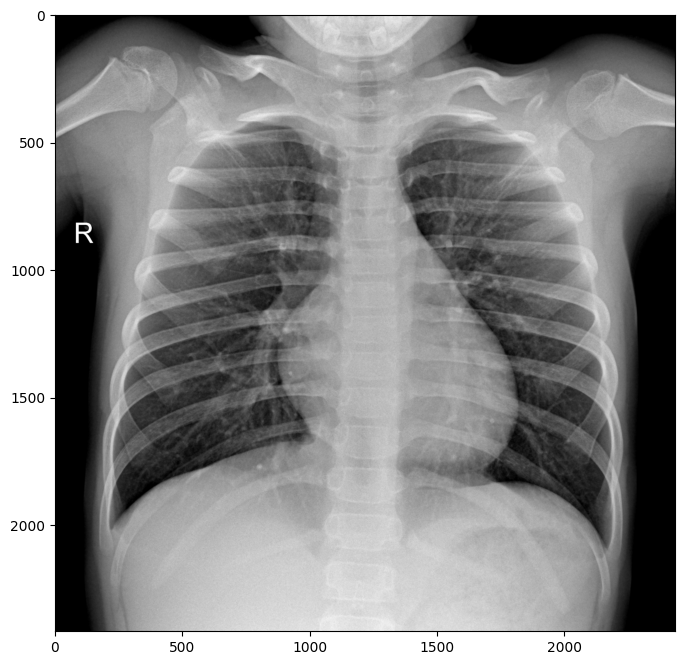

In [9]:
# Accessing and Displaying Normal X-ray from directory

img1 = cv2.imread(os.path.join('Training Data', 'NORMAL', 'NORMAL-28501-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img1)
plt.show()

In [10]:
# Looking at Image shape befor preprpcessing
img1.shape

(2418, 2434, 3)

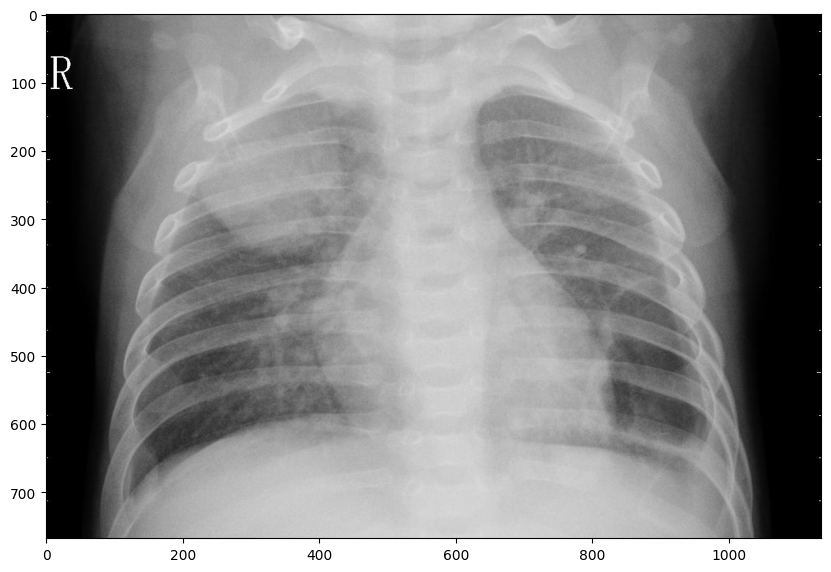

In [11]:
# Accessing and Displaying Pneumonia(Bacterial) X-ray from directory

img2 = cv2.imread(os.path.join('Training Data','PNEUMONIA','BACTERIA-84621-0001.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img2)
plt.show()

In [12]:
# Looking at Image shape befor preprpcessing
img2.shape

(768, 1136, 3)

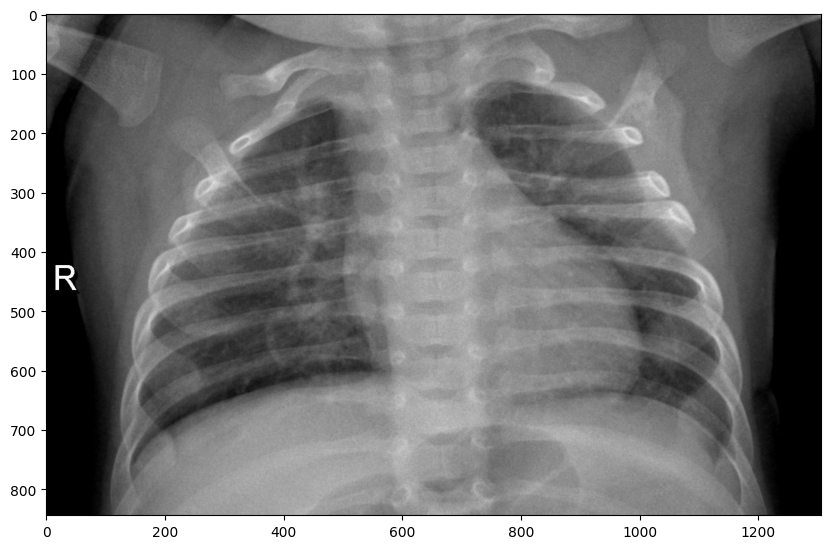

In [13]:
# Accessing and Displaying Pneumonia(Viral) X-ray from directory

img3 = cv2.imread(os.path.join('Training Data','PNEUMONIA','VIRUS-4757979-0003.jpeg'))

plt.figure(figsize=(10, 8))

plt.imshow(img3)
plt.show()

In [14]:
# Looking at Image shape befor preprpcessing
img3.shape

(844, 1306, 3)

## Data Preparation

In [15]:
# 80% Training Split
train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256))  # Setting seed and standardizing image size

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [16]:
# 20% Validation Split
val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123, image_size=(256,256)) # Setting seed and standardizing image size

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [17]:
# Test Split
test_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir_test,
  seed=123, image_size=(256,256)) # Setting seed and standardizing image size

Found 624 files belonging to 2 classes.


In [18]:
# Accessing trainig images from directory
classes = os.listdir(img_dir_train)
# Accessing training classes from directory
class_names = np.array(classes)

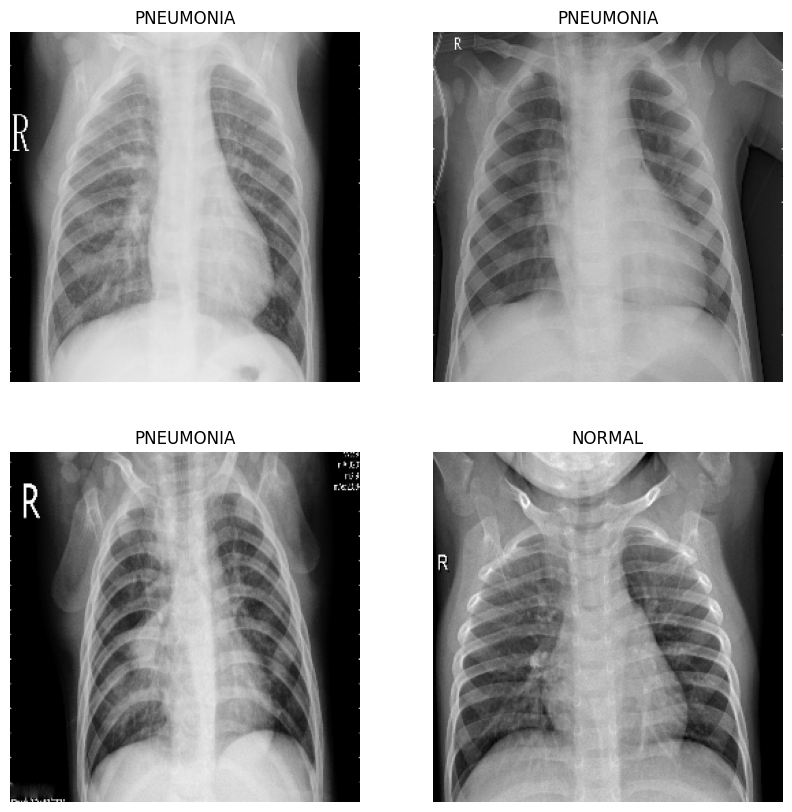

In [19]:
# Diplaying x-ray images with class labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2,2,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Analysis and Results

In [20]:
# Additional imports for  deep modeling 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

In [54]:
# COnfigure data for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [55]:
# Standardizing the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [59]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [61]:
# Creating Initial Model
num_classes = len(class_names)

model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [62]:
# Compiling model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
# Allows all of the layers to be viewed
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)       

In [64]:
# Training the model for 10 epochs
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
131/131 [==============================] - 60s 453ms/step - loss: 0.2580 - accuracy: 0.8997 - val_loss: 0.1043 - val_accuracy: 0.9637
Epoch 2/10
131/131 [==============================] - 57s 436ms/step - loss: 0.0956 - accuracy: 0.9649 - val_loss: 0.1362 - val_accuracy: 0.9484
Epoch 3/10
131/131 [==============================] - 59s 450ms/step - loss: 0.0735 - accuracy: 0.9725 - val_loss: 0.1004 - val_accuracy: 0.9665
Epoch 4/10
131/131 [==============================] - 85s 650ms/step - loss: 0.0495 - accuracy: 0.9804 - val_loss: 0.0834 - val_accuracy: 0.9732
Epoch 5/10
131/131 [==============================] - 61s 468ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.1061 - val_accuracy: 0.9685
Epoch 6/10
131/131 [==============================] - 64s 493ms/step - loss: 0.0274 - accuracy: 0.9900 - val_loss: 0.0983 - val_accuracy: 0.9761
Epoch 7/10
131/131 [==============================] - 62s 476ms/step - loss: 0.0173 - accuracy: 0.9935 - val_loss: 0.1157 - val_ac

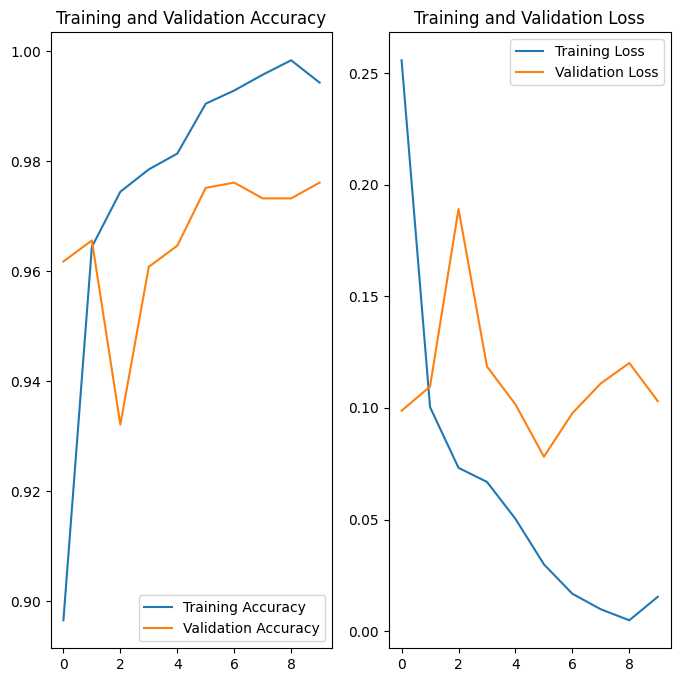

In [28]:
# Graphing the results of the initial modeling process
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
# Generating additional training data from existing data using random transformations
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

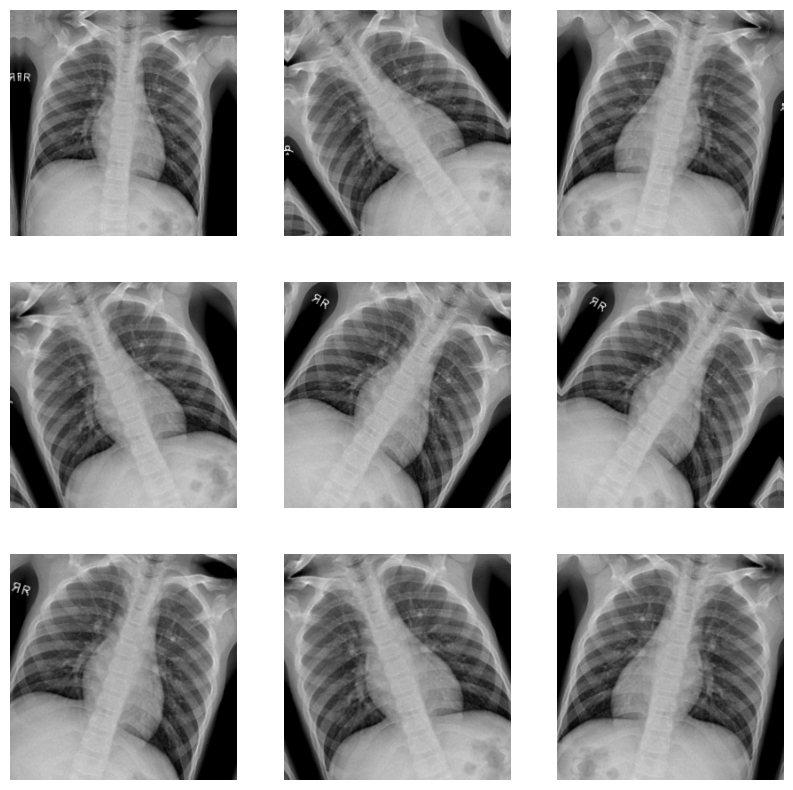

In [30]:
# Visualizing augmented images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
# Creating Secondary Model
# Dropping out layer from initial model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [32]:
# Compiling Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [34]:
# Training the model for 15 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
131/131 [==============================] - 107s 800ms/step - loss: 0.4760 - accuracy: 0.7914 - val_loss: 0.2795 - val_accuracy: 0.8738
Epoch 2/15
131/131 [==============================] - 100s 759ms/step - loss: 0.2368 - accuracy: 0.8992 - val_loss: 0.1954 - val_accuracy: 0.9235
Epoch 3/15
131/131 [==============================] - 92s 702ms/step - loss: 0.2104 - accuracy: 0.9138 - val_loss: 0.1906 - val_accuracy: 0.9340
Epoch 4/15
131/131 [==============================] - 596s 5s/step - loss: 0.1847 - accuracy: 0.9252 - val_loss: 0.1898 - val_accuracy: 0.9340
Epoch 5/15
131/131 [==============================] - 120s 912ms/step - loss: 0.1685 - accuracy: 0.9286 - val_loss: 0.2050 - val_accuracy: 0.9226
Epoch 6/15
131/131 [==============================] - 97s 733ms/step - loss: 0.1507 - accuracy: 0.9408 - val_loss: 0.1547 - val_accuracy: 0.9417
Epoch 7/15
131/131 [==============================] - 88s 672ms/step - loss: 0.1715 - accuracy: 0.9293 - val_loss: 0.1702 - val_a

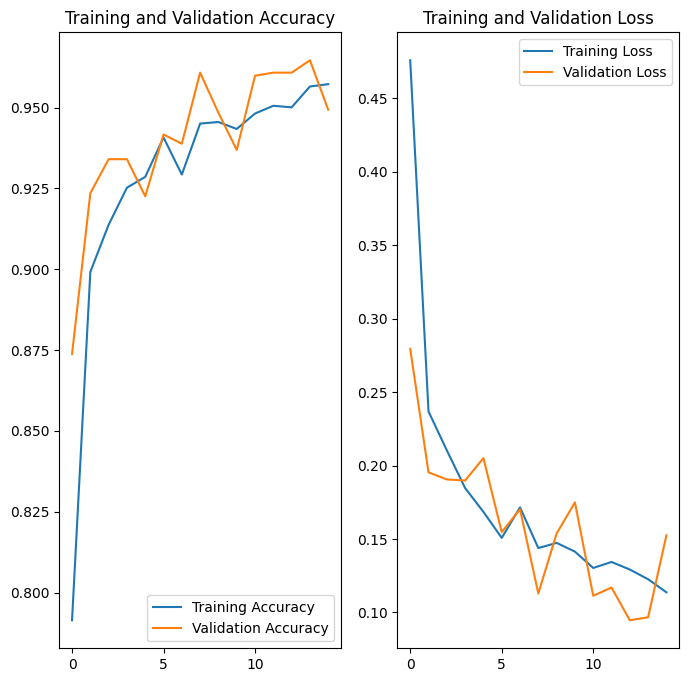

In [35]:
# Visualizing Second Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
# Creating Final Model
model3 = Sequential()

In [49]:
# Constructing Model
model3.add(Rescaling(1./255, input_shape=(256, 256, 3)))
model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(32, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [50]:
# Compiling Model
model3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
# Visualizing Layers
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)       

In [52]:
# Set the directory where TensorBoard will store log files for visualization.
logdir = 'logs'

# Create a TensorBoard callback to integrate with the training process.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
# Training the model for 20 epochs
hist = model3.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20


131/131 [==============================] - 43s 321ms/step - loss: 0.2308 - accuracy: 0.9037 - val_loss: 0.1005 - val_accuracy: 0.9627
Epoch 2/20
131/131 [==============================] - 43s 330ms/step - loss: 0.0973 - accuracy: 0.9646 - val_loss: 0.0672 - val_accuracy: 0.9713
Epoch 3/20
131/131 [==============================] - 44s 338ms/step - loss: 0.1199 - accuracy: 0.9544 - val_loss: 0.0949 - val_accuracy: 0.9675
Epoch 4/20
131/131 [==============================] - 44s 332ms/step - loss: 0.0707 - accuracy: 0.9744 - val_loss: 0.0645 - val_accuracy: 0.9799
Epoch 5/20
131/131 [==============================] - 48s 366ms/step - loss: 0.0505 - accuracy: 0.9830 - val_loss: 0.0650 - val_accuracy: 0.9837
Epoch 6/20
131/131 [==============================] - 46s 346ms/step - loss: 0.0435 - accuracy: 0.9842 - val_loss: 0.1145 - val_accuracy: 0.9637
Epoch 7/20
131/131 [==============================] - 44s 331ms/step - loss: 0.0282 - accuracy: 0.9897 - val_loss: 0.0616 - val_accuracy: 0.9

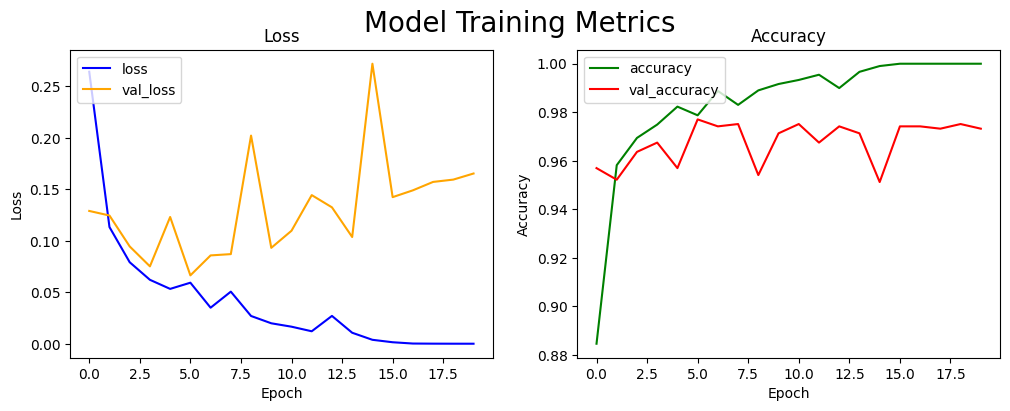

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training & validation loss values
ax1.plot(hist.history['loss'], color='blue', label='loss')
ax1.plot(hist.history['val_loss'], color='orange', label='val_loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc="upper left")

# Plot training & validation accuracy values
ax2.plot(hist.history['accuracy'], color='green', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc="upper left")

plt.suptitle('Model Training Metrics', fontsize=20)
plt.show()

In [43]:
# Evaluating Model on Validation Data
model.evaluate(val_ds)

33/33 [==============================] - 3s 81ms/step - loss: 0.1653 - accuracy: 0.9732


[0.1653444468975067, 0.9732313752174377]

#### The model above displays the highest validation accuracy score indicating that it is the best model although being slightly overfit.

In [44]:
# Evaluating Model on Testing Data
model.evaluate(test_ds)

20/20 [==============================] - 9s 310ms/step - loss: 2.1803 - accuracy: 0.8301


[2.1803414821624756, 0.8301281929016113]

## Conclusion

#### Based on the low accuracy score on the test data I wouldn't be confortable releasing the current model into production. In addition to this, accuracy may not have been the best metric to evaluate the moodels performance. When looking at the accuracy scoe of the test set in comparison to the validation set there was a very signaficant difference of about 15%. This diefference might quite possibly be due to improper class labeling. This error could possibly be rectified by splitting the training data into a training, validation, and test set.

### Next Steps

#### Further Tuning would be necessary to build a viable X-ray classification program for detecting pneumonia. In additiona to this, the f1 score would be a much better metric used to evaluate this model. The worst possible outcome of this detection program would be the generation of false negatives, or failing to detect pneumonia in a patient's X-ray when they are afflicted with this ailment. The f1 metric allows us to look at the false negatives generated by this model so we can then adequately tune our model to minimize this result as much as possible. Another consideration would be using this model on X- rays of adults with the same condiction to see if the detection sytem works as good as it does on the pediatric X-rays. Finally, we should introduce fungal pneumonia into our training set instead of look at just bacterial and viral pneumonia.   